**Multi-Class Classification**

#Obesity level prediction 

In [5]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
%matplotlib inline

In [6]:
#loading dat from csv file
obesity_df = pd.read_csv("D:\dataForPractice\dataset_for_ML_assign\ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Variable full description**

FAVC --> Do you eat high caloric food frequently

FCVC --> Do you usually eat vegetables in your meals?

NCP --> How many main meals do you have daily?

CAEC --> Do you eat any food between meals?

SMOKe --> Do you smoke?

CH20 --> How much water do you drink daily?

SCC --> Do you monitor the calories you eat daily?

FAF --> How often do you have physical activity?

TUE --> How much time do you use technological devices such as cell phone , computer, TV,videogames, etc. daily?

CALC --> How often do you drink alcohol?

MTRANS --> which transportation do you usually use?

NObeyesdad(Target) --> Obesity level

In [7]:
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
print(f"no. of Median of Transport: {obesity_df['MTRANS'].value_counts()}")
print(f"no. of different types of Obesity levels: {obesity_df['NObeyesdad'].value_counts()}")

no. of Median of Transport: MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
no. of different types of Obesity levels: NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [9]:
obesity_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Important Visualizations**

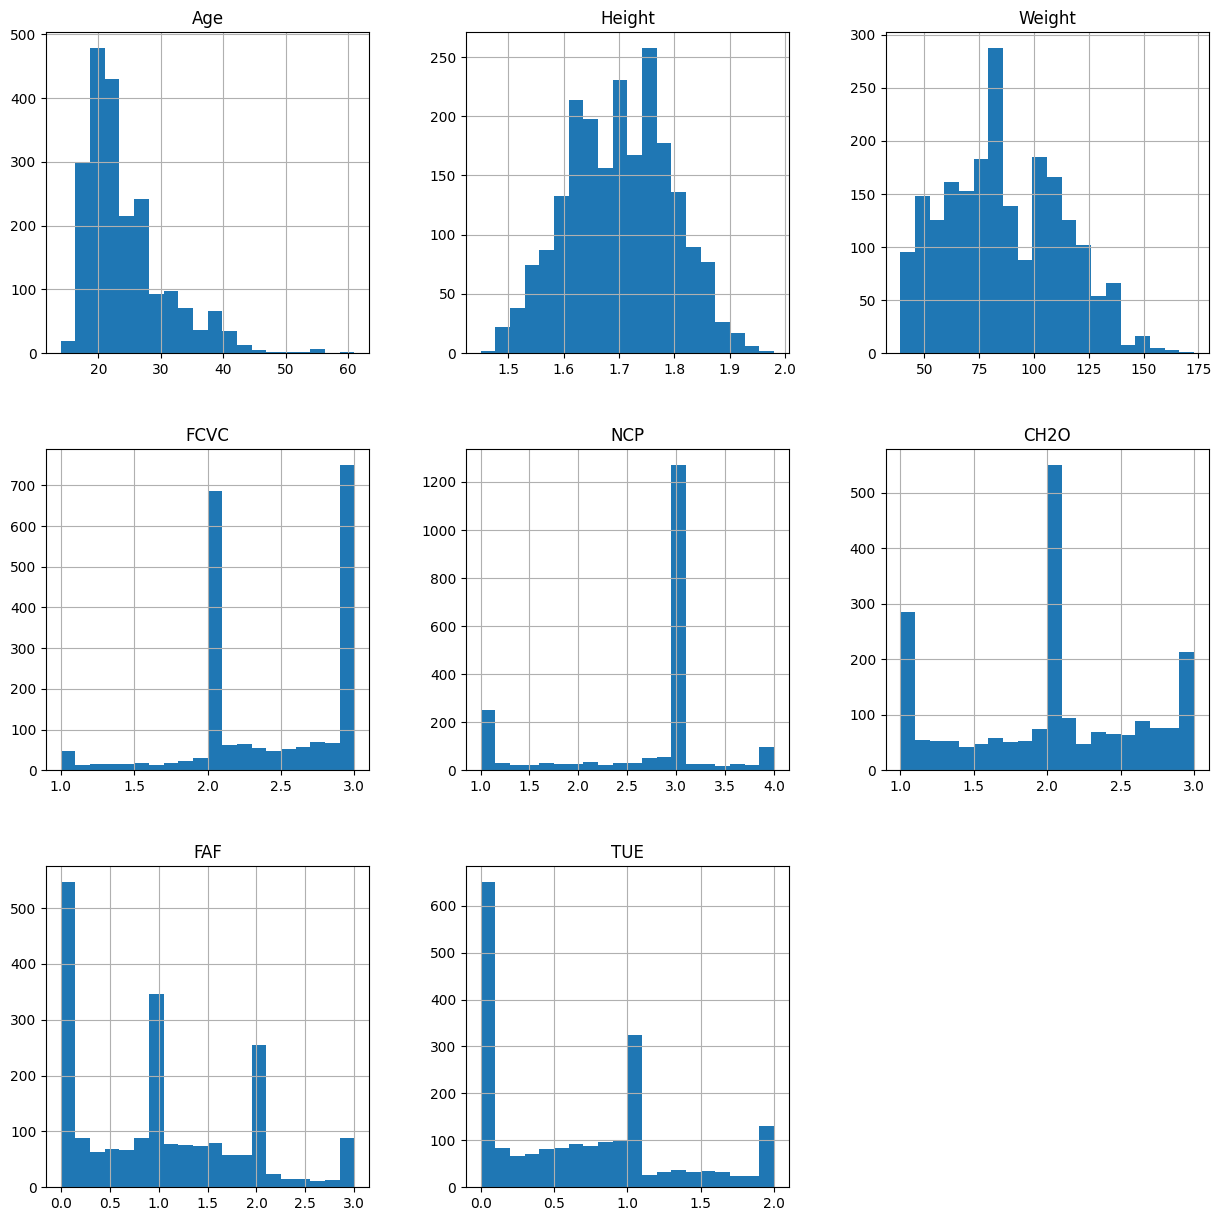

In [10]:
obesity_df.hist(bins=20,figsize=(15,15))
plt.title("Histogram of the data")
plt.show()

<Axes: >

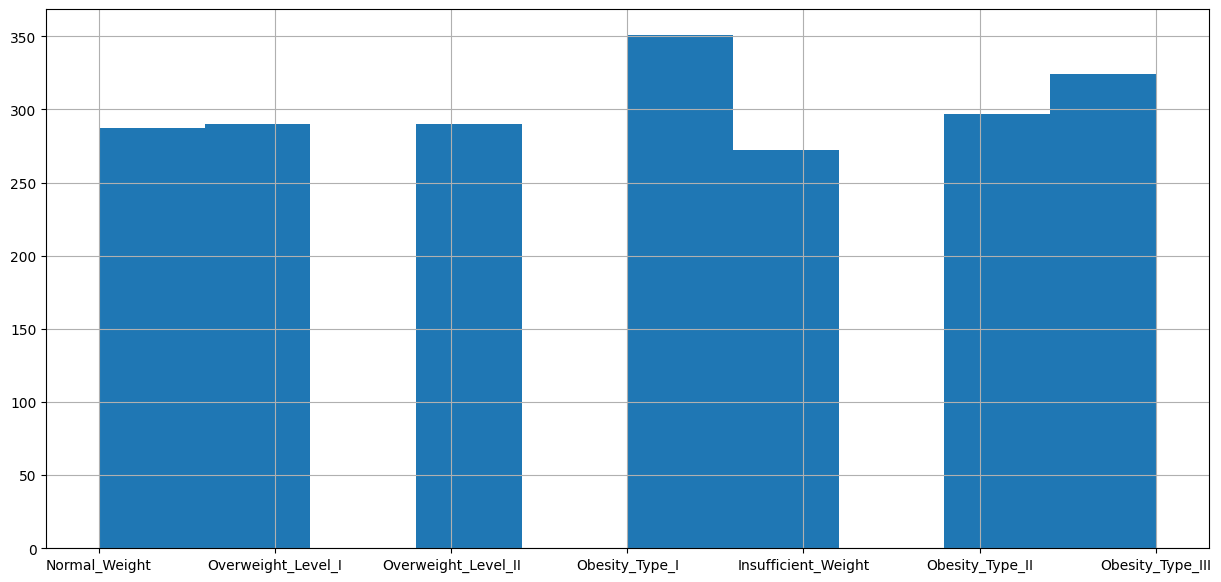

In [12]:
obesity_df['NObeyesdad'].hist(figsize=(15,7))

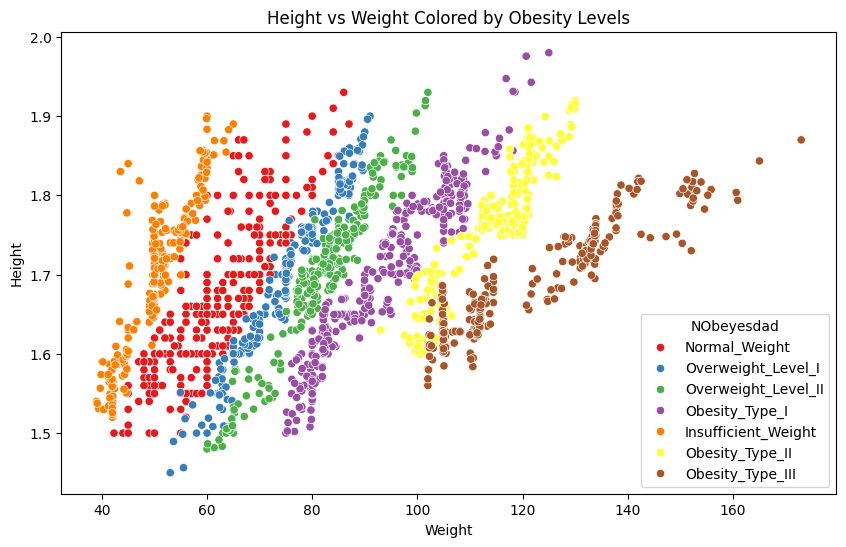

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=obesity_df, x='Weight', y='Height', hue='NObeyesdad', palette='Set1')
plt.title('Height vs Weight Colored by Obesity Levels')
plt.show()

<Axes: xlabel='Weight', ylabel='Height'>

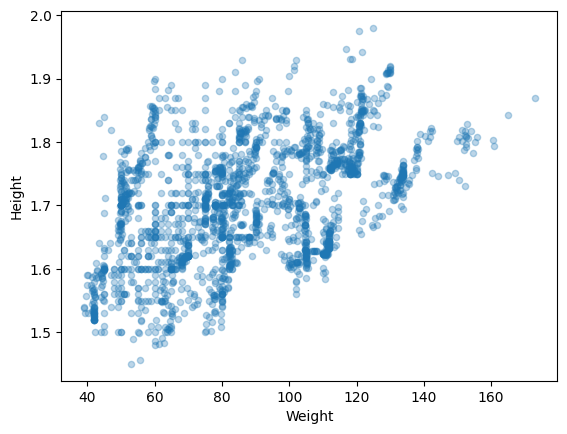

In [14]:
obesity_df.plot(kind="scatter", x  = 'Weight', y = 'Height', alpha = 0.3)

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Length: 2111, dtype: int8


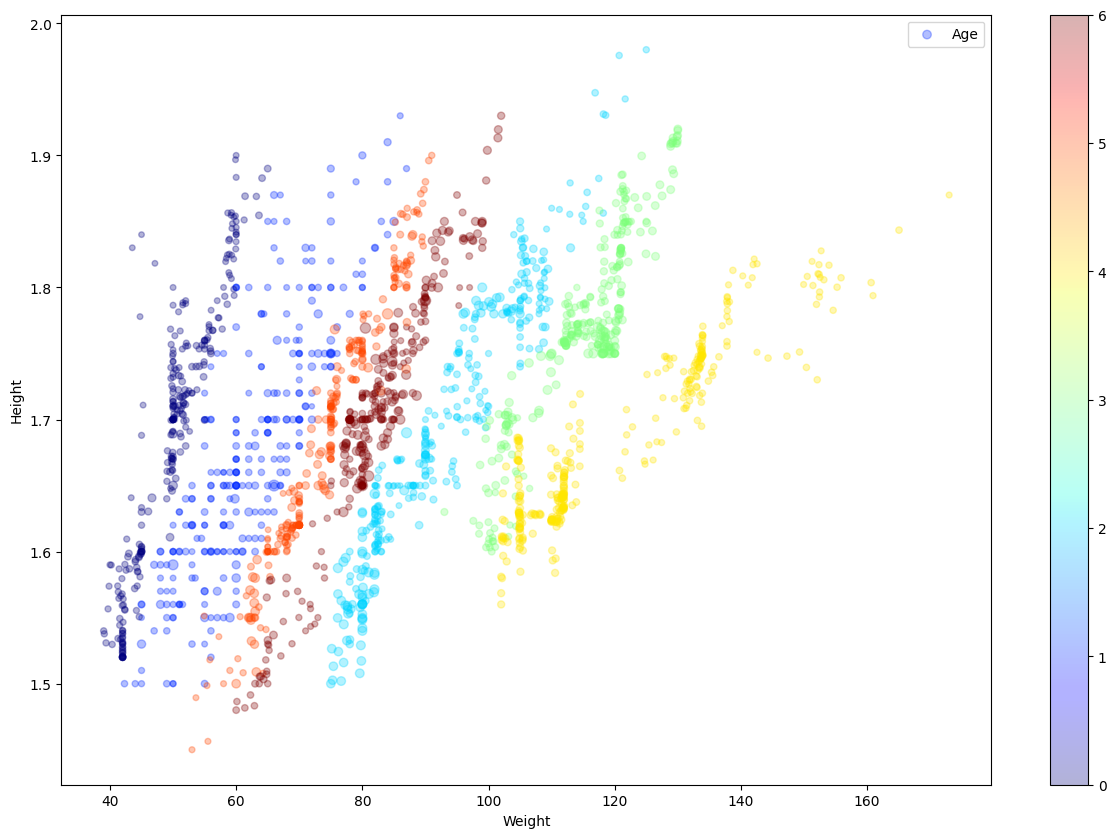

In [78]:
#encoding obesity column to numeric values 
obes_encoded = obesity_df['NObeyesdad'].astype('category').cat.codes
print(obes_encoded)
obesity_df.plot(kind='scatter',x='Weight',y='Height',alpha= 0.3,
               s= obesity_df['Age'], label='Age',figsize=(15,10),
               c=obes_encoded,cmap=plt.get_cmap('jet'),colorbar='True')
plt.legend()

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Weight', ylabel='Age'>,
        <Axes: xlabel='Height', ylabel='Age'>,
        <Axes: xlabel='CH2O', ylabel='Age'>,
        <Axes: xlabel='FAF', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Weight'>,
        <Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='CH2O', ylabel='Weight'>,
        <Axes: xlabel='FAF', ylabel='Weight'>],
       [<Axes: xlabel='Age', ylabel='Height'>,
        <Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='CH2O', ylabel='Height'>,
        <Axes: xlabel='FAF', ylabel='Height'>],
       [<Axes: xlabel='Age', ylabel='CH2O'>,
        <Axes: xlabel='Weight', ylabel='CH2O'>,
        <Axes: xlabel='Height', ylabel='CH2O'>,
        <Axes: xlabel='CH2O', ylabel='CH2O'>,
        <Axes: xlabel='FAF', ylabel='CH2O'>],
       [<Axes: xlabel='Age', ylabel='FAF'>,
        <

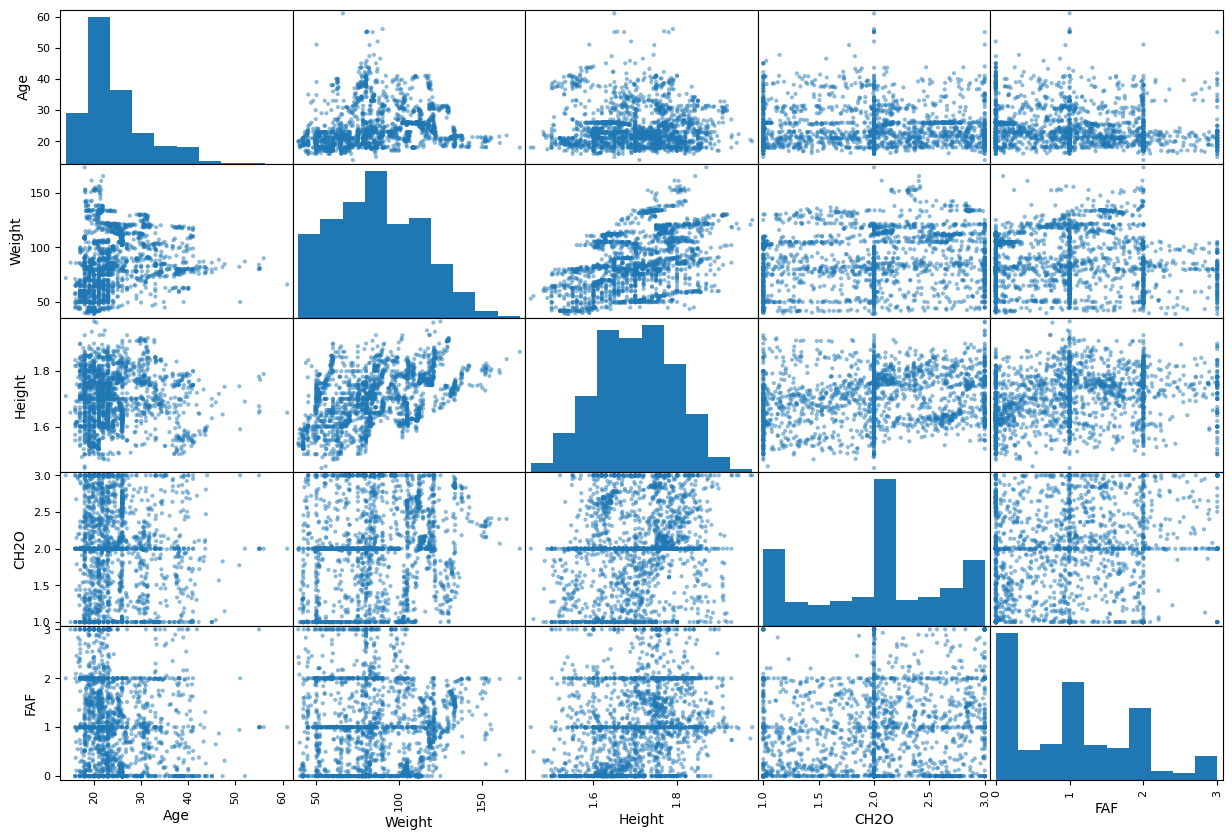

In [15]:
#checking for correlation between attributes
from pandas.plotting import scatter_matrix
attributes = ['Age','Weight','Height','CH2O','FAF']
scatter_matrix(obesity_df[attributes], figsize=(15,10))

**Data Cleaning and Preprocessing**

In [19]:
#data cleaning and preprocessing
X = obesity_df.drop(columns=['NObeyesdad',]) 
y = obesity_df['NObeyesdad']
#encoding  categorical variables and Standadizing numerical features
#with column transformer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_clmns = ['Gender','family_history_with_overweight','FAVC','CAEC',
                     'SMOKE','CALC','SCC','MTRANS']
numerical_clmns = ['Age','Height', 'Weight','FCVC','NCP','CH2O','FAF','TUE']

#initilizing onehotencoder and standardscaler
onehot_encoder = OneHotEncoder(sparse_output=False)
scaler = StandardScaler()
label_encode = LabelEncoder()#for target column

#ColumnTransoformer
clmn_transformer = ColumnTransformer(
    transformers=[
        ('cat',onehot_encoder,categorical_clmns),
        ('num', scaler, numerical_clmns)
    ],
)

#fitting and transforming the  train data
X_train = clmn_transformer.fit_transform(X_train)
y_train = label_encode.fit_transform(y_train)
#transorming the test data
X_test = clmn_transformer.transform(X_test)
y_test = label_encode.transform(y_test)

#converting the results back tp dataframe
encoded_columns = clmn_transformer.named_transformers_['cat'].get_feature_names_out(categorical_clmns)
all_columns = list(encoded_columns) + numerical_clmns

# Check the shape of the transformed data
print("Shape of transformed data:", X_train.shape)
# Convert transformed data into a DataFrame
transformed_df = pd.DataFrame(X_train, columns=all_columns)

Shape of transformed data: (1477, 31)


In [35]:


# # View the transformed DataFrame and target column
print(transformed_df.columns)
print(y_train[0:23])

Index(['Gender_Female', 'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'CALC_Always', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O',
       'FAF', 'TUE'],
      dtype='object')
[4 4 6 1 5 6 3 4 0 2 4 1 4 1 2 3 2 2 4 0 6 4 3]


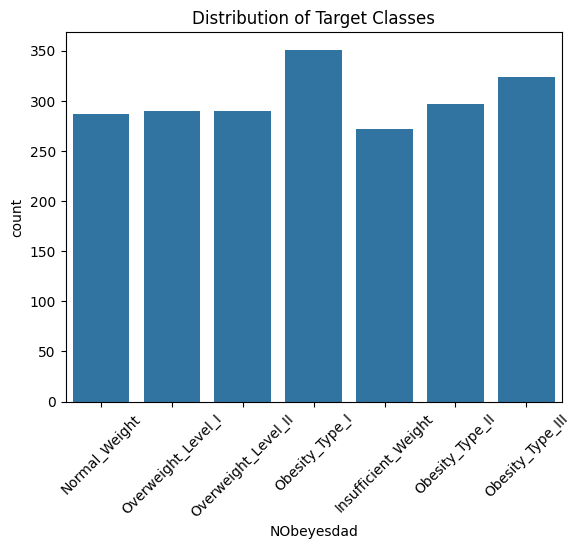

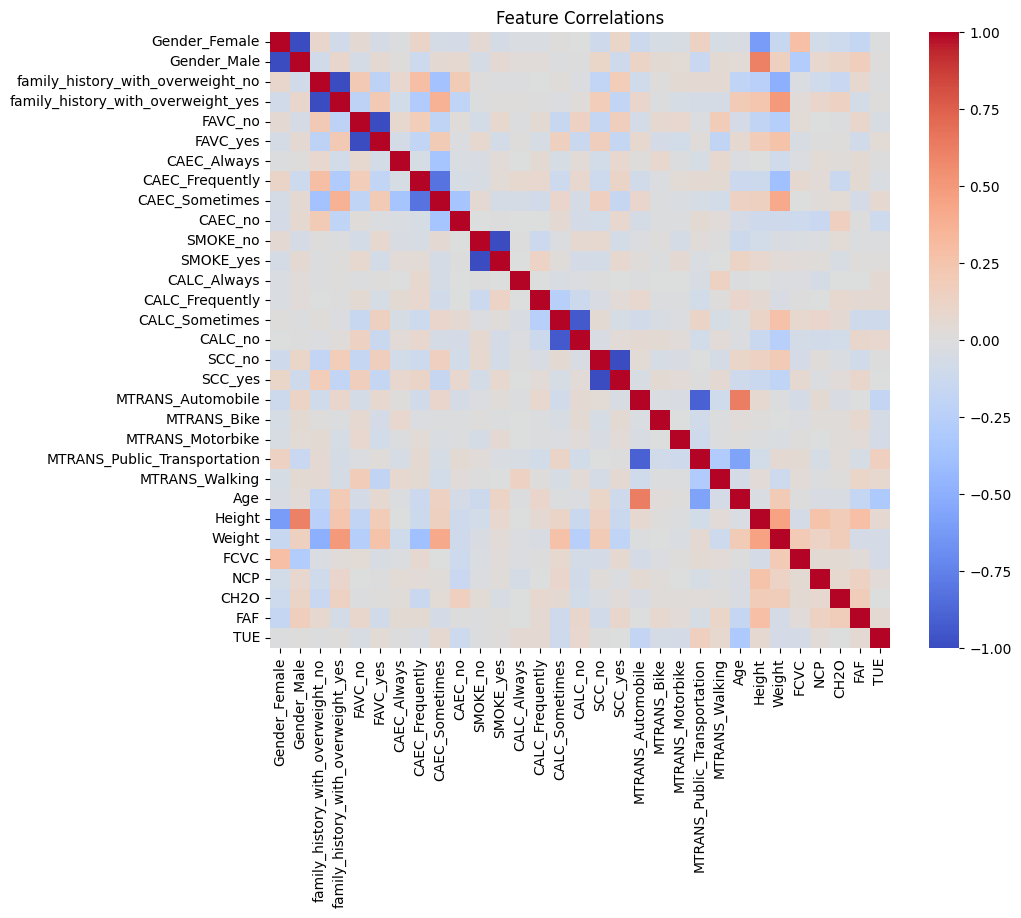

In [20]:
# Visualize the target variable distribution
sns.countplot(x='NObeyesdad', data=obesity_df)
plt.title('Distribution of Target Classes')
plt.xticks(rotation=45)
plt.show()

# Correlation heatmap (for numerical features)
plt.figure(figsize=(10,8))
sns.heatmap(transformed_df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [36]:
#checking shape's for training data
print(X_train.shape)
print(y_train.shape) 

(1477, 31)
(1477,)


**Cross-validations for each model to know which model performs well**

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize the SVM model
svm_model = SVC(probability=True)

# Perform 5-fold cross-validation on the training set
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=15)
# Print cross-validation scores for each fold and the mean score
print("SVM Cross-validation scores:", svm_cv_scores)
print("SVM Mean cross-validation score:", svm_cv_scores.mean())


SVM Cross-validation scores: [0.92929293 0.87878788 0.91919192 0.91919192 0.8989899  0.92929293
 0.92929293 0.90816327 0.82653061 0.93877551 0.86734694 0.93877551
 0.87755102 0.97959184 0.90816327]
SVM Mean cross-validation score: 0.9099292242149383


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Perform 5-fold cross-validation on the training set
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=15)

# Print cross-validation scores for each fold and the mean score
print("Gradient Boosting Cross-validation scores:", gb_cv_scores)
print("Gradient Boosting Mean cross-validation score:", gb_cv_scores.mean())


Gradient Boosting Cross-validation scores: [0.96969697 0.95959596 0.95959596 0.94949495 0.95959596 0.93939394
 0.98989899 0.93877551 0.95918367 0.96938776 0.95918367 0.95918367
 0.94897959 0.97959184 0.98979592]
Gradient Boosting Mean cross-validation score: 0.9620902906617191


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform 5-fold cross-validation on the training set
knn_cv_scores = cross_val_score(knn_model, X_train, y_train, cv=15)

# Print cross-validation scores for each fold and the mean score
print("KNN Cross-validation scores:", knn_cv_scores)
print("KNN Mean cross-validation score:", knn_cv_scores.mean())


KNN Cross-validation scores: [0.83838384 0.80808081 0.81818182 0.7979798  0.81818182 0.78787879
 0.85858586 0.81632653 0.76530612 0.83673469 0.82653061 0.78571429
 0.81632653 0.89795918 0.82653061]
KNN Mean cross-validation score: 0.81991341991342


In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier()

# Perform 5-fold cross-validation on the training set
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=15)

# Print cross-validation scores for each fold and the mean score
print("Decision Tree Cross-validation scores:", dt_cv_scores)
print("Decision Tree Mean cross-validation score:", dt_cv_scores.mean())


Decision Tree Cross-validation scores: [0.90909091 0.93939394 0.90909091 0.95959596 0.92929293 0.93939394
 0.95959596 0.92857143 0.93877551 0.90816327 0.93877551 0.94897959
 0.92857143 0.94897959 0.93877551]
Decision Tree Mean cross-validation score: 0.9350030921459492


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation on the training set
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=15)

# Print cross-validation scores for each fold and the mean score
print("Random Forest Cross-validation scores:", rf_cv_scores)
print("Random Forest Mean cross-validation score:", rf_cv_scores.mean())


Random Forest Cross-validation scores: [1.         0.93939394 0.93939394 0.94949495 0.92929293 0.94949495
 0.92929293 0.95918367 0.8877551  0.95918367 0.92857143 0.94897959
 0.91836735 0.98979592 0.95918367]
Random Forest Mean cross-validation score: 0.9458256029684603


**Hyper-parameter tunning on GradientBoosting Classifier and RandomForest Classifier because, These two gave better performance**

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter grid for Gradient Boosting
gb_params = {
    'n_estimators': randint(50, 200),  # number of boosting stages
    'learning_rate': uniform(0.01, 0.3),  # learning rate between 0.01 and 0.3
    'max_depth': randint(3, 10),  # depth of the individual estimators
    'min_samples_split': randint(2, 20),  # min samples to split a node
    'min_samples_leaf': randint(1, 10),  # min samples in a leaf node
    'subsample': uniform(0.6, 0.4),  # fraction of samples used for fitting
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=gb_model, 
                                      param_distributions=gb_params, 
                                      n_iter=50,  # Number of random samples
                                      scoring='accuracy', 
                                      cv=15,  # 15-fold cross-validation
                                      verbose=1, 
                                      n_jobs=-1, 
                                      random_state=42)

# Fit the model to the training data
random_search_gb.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)
print("Best Cross-Validation Accuracy for Gradient Boosting:", random_search_gb.best_score_)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Best Parameters for Gradient Boosting: {'learning_rate': np.float64(0.24950353749536533), 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 17, 'n_estimators': 142, 'subsample': np.float64(0.943343521925488)}
Best Cross-Validation Accuracy for Gradient Boosting: 0.9749398749398747


In [27]:
# Define the parameter grid for Random Forest
rf_params = {
    'n_estimators': randint(100, 500),  # number of trees in the forest
    'max_depth': randint(5, 30),  # maximum depth of the tree
    'min_samples_split': randint(2, 20),  # minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10),  # minimum number of samples required in a leaf node
    'max_features': ['sqrt', 'log2',None],  # number of features to consider for the best split
    'bootstrap': [True, False],  # whether bootstrap samples are used when building trees
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_model, 
                                      param_distributions=rf_params, 
                                      n_iter=50,  # Number of random samples
                                      scoring='accuracy', 
                                      cv=15,  # 15-fold cross-validation
                                      verbose=1, 
                                      n_jobs=-1, 
                                      random_state=42)

# Fit the model to the training data
random_search_rf.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", random_search_rf.best_score_)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Best Parameters for Random Forest: {'bootstrap': False, 'max_depth': 29, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 403}
Best Cross-Validation Accuracy for Random Forest: 0.949213220641792


**Even after hyper-tuning parameters Random forest classifier gave slight improvement. so, we are going to use Gradient  Boosting Classifier as it showed significant  improvement in accuracy.**

In [28]:
best_gb_model = random_search_gb.best_estimator_
best_gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=np.float64(0.24950353749536533),
                           min_samples_leaf=6, min_samples_split=17,
                           n_estimators=142,
                           subsample=np.float64(0.943343521925488))

In [29]:
#predicting with gradient boosting 
gb_pred = best_gb_model.predict(X_test)

In [30]:
#performance metrices for gradient boosting
print('Gradient Boosting preformance')
print('Accuracy: ', accuracy_score(y_test,gb_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,gb_pred))
print('Classification report: \n',  classification_report(y_test,gb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, best_gb_model.predict_proba(X_test),multi_class='ovr'))

Gradient Boosting preformance
Accuracy:  0.9574132492113565
Confusion Matrix:
 [[85  1  0  0  0  0  0]
 [ 4 81  0  0  0  8  0]
 [ 0  0 97  3  0  2  0]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0  3  0  0  0 83  2]
 [ 0  0  0  0  0  2 77]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        86
           1       0.95      0.87      0.91        93
           2       0.98      0.95      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.87      0.94      0.91        88
           6       0.97      0.97      0.97        79

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

ROC AUC Score: 0.9983265764265484


In [31]:
import pickle
# Save the Gradient Boosting model
with open('gradient_boosting_model.pkl', 'wb') as model_file:
    pickle.dump(best_gb_model, model_file)

In [32]:
with open('column_transformer.pkl', 'wb') as transformer_file:
    pickle.dump(clmn_transformer, transformer_file)

In [33]:
# Save the LabelEncoder for the target column
with open('label_encoder.pkl', 'wb') as label_file:
    pickle.dump(label_encode, label_file)